In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import fitsio
from matplotlib.colors import LogNorm

In [2]:
ssiDetFile = '/hdfs/bechtol/balrog/y3/balrog_detection_catalog_sof_run2_stars_v1.4_avg_added_match_flags.fits'
ssiMatFile = '/hdfs/bechtol/balrog/y3/balrog_matched_catalog_sof_run2_stars_v1.4.fits'
G,R,I,Z = 0,1,2,3

In [3]:
ssiDetData = fitsio.read(ssiDetFile, columns = ['detected', 'true_ra', 'true_dec'])
ssiDetFlag = ssiDetData['detected']
ssiDetRa = ssiDetData['true_ra']
ssiDetDec = ssiDetData['true_dec']

In [4]:
indices = np.where(ssiDetRa > 200)[0]
ssiDetRaAdj = np.copy(ssiDetRa)
ssiDetRaAdj[indices] = ssiDetRa[indices] - 360

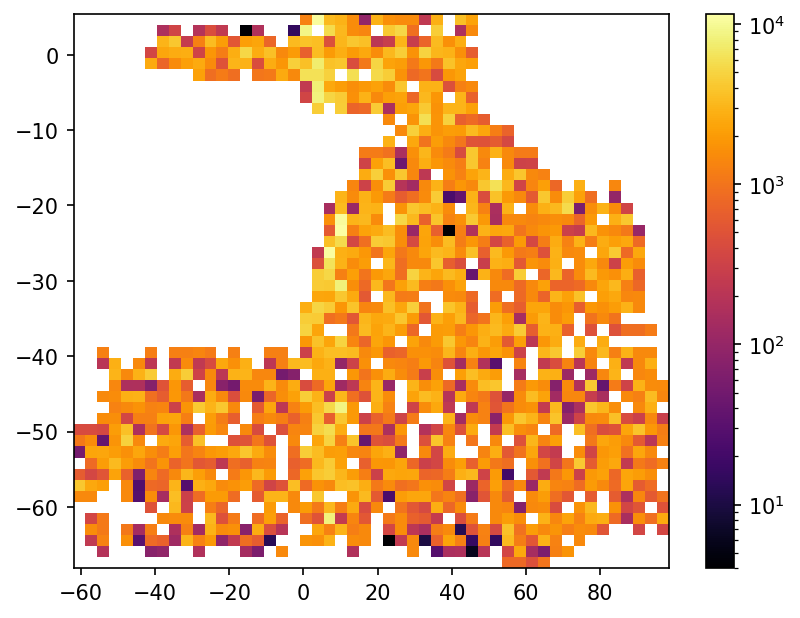

In [5]:
plt.figure(dpi = 150)
plt.hist2d(ssiDetRaAdj, ssiDetDec, bins = 50, cmap=plt.cm.inferno, norm = LogNorm())
plt.colorbar()
plt.show()

In [6]:
ssiMatData = fitsio.read(ssiMatFile, columns = ['meas_psf_mag', 'true_PSF_MAG_G', 'true_PSF_MAG_R', 'true_PSF_MAG_I', 'true_PSF_MAG_Z', 'meas_ra', 'meas_dec', 'true_g_Corr', 'true_gr_Corr', 'true_ri_Corr', 'true_iz_Corr'])

In [7]:
ssiMatTrueG = ssiMatData['true_PSF_MAG_G']
ssiMatTrueR = ssiMatData['true_PSF_MAG_R']
ssiMatTrueI = ssiMatData['true_PSF_MAG_I']
ssiMatTrueZ = ssiMatData['true_PSF_MAG_Z']

ssiMatMeasG = ssiMatData['meas_psf_mag'][:,G]
ssiMatMeasR = ssiMatData['meas_psf_mag'][:,R]
ssiMatMeasI = ssiMatData['meas_psf_mag'][:,I]
ssiMatMeasZ = ssiMatData['meas_psf_mag'][:,Z]

RA = ssiMatData['meas_ra']
DEC = ssiMatData['meas_dec']

gCorr = ssiMatData['true_g_Corr']
grCorr = ssiMatData['true_gr_Corr']
riCorr = ssiMatData['true_ri_Corr']
izCorr = ssiMatData['true_iz_Corr']

In [8]:
gFilter = np.where((ssiMatMeasG > -9000) & (ssiMatMeasG < 35))[0]
rFilter = np.where((ssiMatMeasR > -9000) & (ssiMatMeasR < 35))[0]
iFilter = np.where((ssiMatMeasI > -9000) & (ssiMatMeasI < 35))[0]
zFilter = np.where((ssiMatMeasZ > -9000) & (ssiMatMeasZ < 35))[0]

allFilter = np.where((ssiMatMeasG > -9000) & (ssiMatMeasG < 35) &
                     (ssiMatMeasR > -9000) & (ssiMatMeasR < 35) &
                     (ssiMatMeasI > -9000) & (ssiMatMeasI < 35) &
                     (ssiMatMeasZ > -9000) & (ssiMatMeasZ < 35))[0]

ssiMatTrueG = ssiMatTrueG[allFilter]
ssiMatTrueR = ssiMatTrueR[allFilter]
ssiMatTrueI = ssiMatTrueI[allFilter]
ssiMatTrueZ = ssiMatTrueZ[allFilter]

ssiMatMeasG = ssiMatMeasG[allFilter]
ssiMatMeasR = ssiMatMeasR[allFilter]
ssiMatMeasI = ssiMatMeasI[allFilter]
ssiMatMeasZ = ssiMatMeasZ[allFilter]

RA = RA[allFilter]
DEC = DEC[allFilter]

gCorr = gCorr[allFilter]
grCorr = grCorr[allFilter]
rCorr = gCorr + grCorr
riCorr = riCorr[allFilter]
iCorr = rCorr + riCorr
izCorr = izCorr[allFilter]
zCorr = iCorr + izCorr

In [9]:
ssiMatDiffG = ssiMatMeasG + gCorr
ssiMatDiffR = ssiMatMeasR + rCorr
ssiMatDiffI = ssiMatMeasI + iCorr
ssiMatDiffZ = ssiMatMeasZ + zCorr

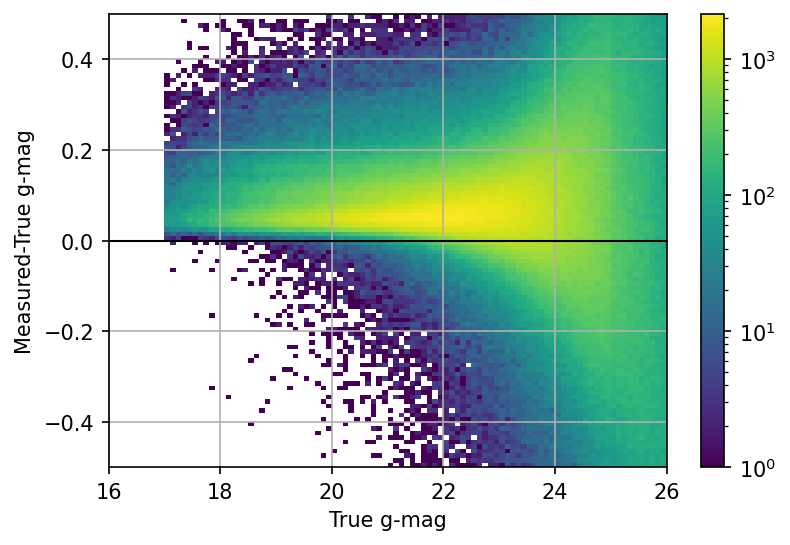

In [10]:
plt.figure(dpi=150)
plt.hist2d(gCorr, ssiMatDiffG, bins = (np.linspace(16,26,101, endpoint=True), np.linspace(-0.5,0.5,101, endpoint=True)), 
           norm=LogNorm(),  cmap=plt.cm.viridis)
plt.axhline(y=0, color='k', linestyle='-', linewidth = 1) # Reference for where perfect accuracy lies
plt.colorbar()
plt.grid()
plt.xlabel('True g-mag')
plt.ylabel('Measured-True g-mag')
plt.show()

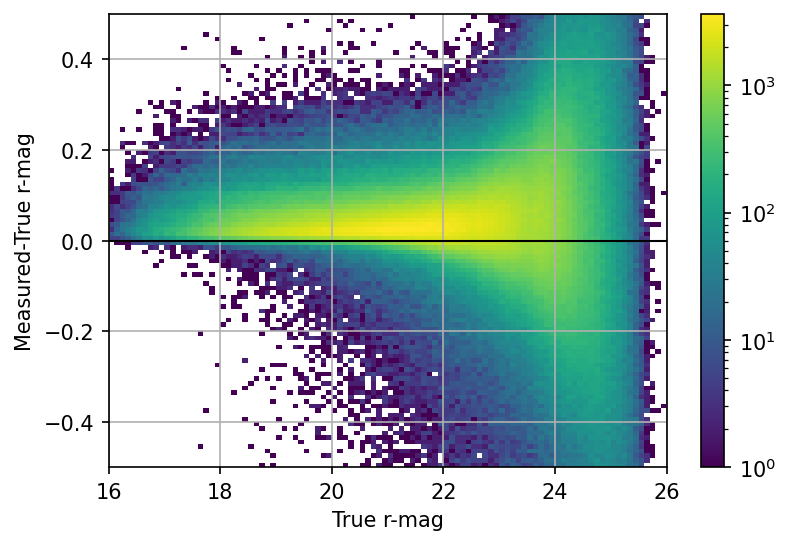

In [11]:
plt.figure(dpi=150)
plt.hist2d(rCorr, ssiMatDiffR, bins = (np.linspace(16,26,101, endpoint=True), np.linspace(-0.5,0.5,101, endpoint=True)), 
           norm = LogNorm(), cmap=plt.cm.viridis)
plt.axhline(y=0, color='k', linestyle='-', linewidth = 1) # Reference for where perfect accuracy lies
plt.colorbar()
plt.grid()
plt.xlabel('True r-mag')
plt.ylabel('Measured-True r-mag')
plt.show()

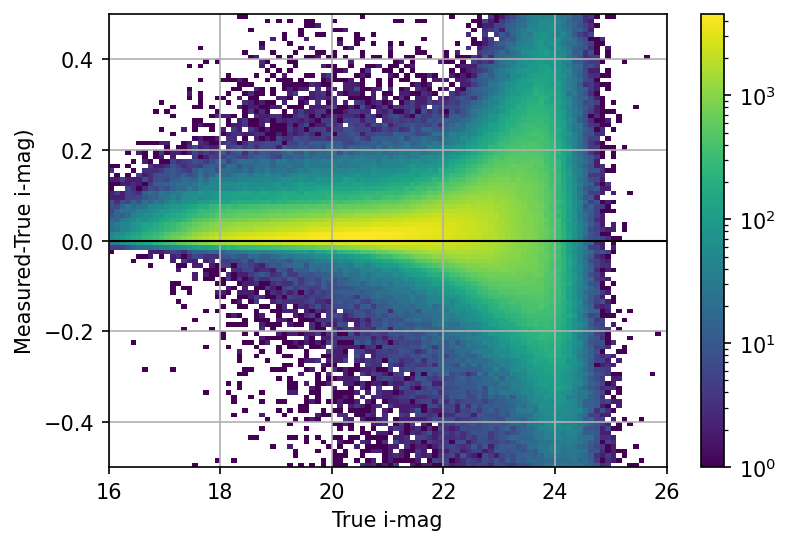

In [12]:
plt.figure(dpi=150)
plt.hist2d(iCorr, ssiMatDiffI, bins = (np.linspace(16,26,101, endpoint=True), np.linspace(-0.5,0.5,101, endpoint=True)), 
           norm=LogNorm(),  cmap=plt.cm.viridis)
plt.axhline(y=0, color='k', linestyle='-', linewidth = 1) # Reference for where perfect accuracy lies
plt.colorbar()
plt.grid()
plt.xlabel('True i-mag')
plt.ylabel('Measured-True i-mag)')
plt.show()

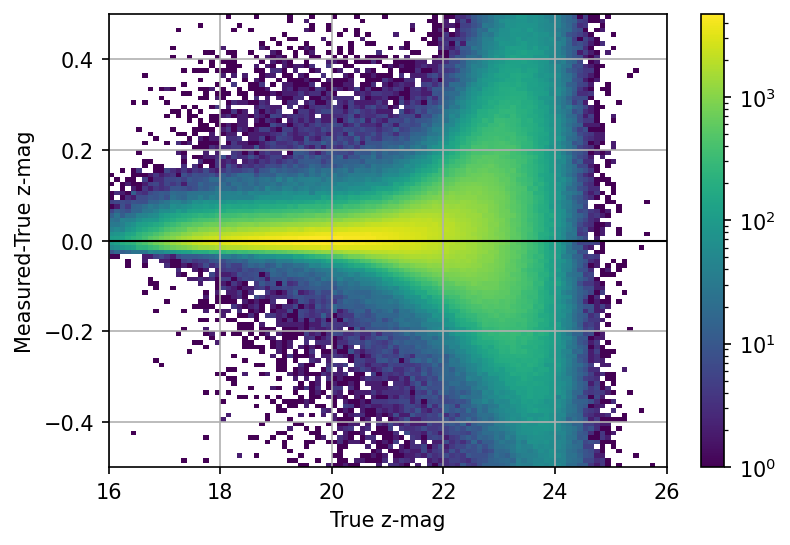

In [13]:
plt.figure(dpi=150)
plt.hist2d(zCorr, ssiMatDiffZ, bins = (np.linspace(16,26,101, endpoint=True), np.linspace(-0.5,0.5,101, endpoint=True)),
           norm=LogNorm(),  cmap=plt.cm.viridis)
plt.axhline(y=0, color='k', linestyle='-', linewidth = 1) # Reference for where perfect accuracy lies
plt.colorbar()
plt.grid()
plt.xlabel('True z-mag')
plt.ylabel('Measured-True z-mag')
plt.show()

In [14]:
# plt.figure(dpi=150)
# plt.hist2d(gCorr, ssiMatMeasG, bins = 100#(np.linspace(18,26,101, endpoint=True), 
#                                            #np.linspace(-4,2,101, endpoint=True))
#            , norm=LogNorm(),  cmap=plt.cm.viridis)
# plt.axvline(x=23, color='k', linestyle='--', linewidth = 1)
# plt.plot([np.min(ssiMatTrueG), np.max(ssiMatTrueG)], [np.min(ssiMatTrueG), np.max(ssiMatTrueG)], 
#          color='k', linestyle='--', linewidth = 1)
# plt.plot([np.min(ssiMatTrueG), np.max(ssiMatTrueG)], [np.min(ssiMatTrueG)+1, np.max(ssiMatTrueG)+1], 
#          color='k', linestyle='--', linewidth = 1)
# plt.plot([np.min(ssiMatTrueG), np.max(ssiMatTrueG)], [np.min(ssiMatTrueG)+2, np.max(ssiMatTrueG)+2], 
#          color='k', linestyle='--', linewidth = 1)
# plt.plot([np.min(ssiMatTrueG), np.max(ssiMatTrueG)], [np.min(ssiMatTrueG)+3, np.max(ssiMatTrueG)+3], 
#          color='k', linestyle='--', linewidth = 1)
# plt.colorbar()
# plt.grid()
# plt.xlabel('True g-mag')
# plt.ylabel('Measured g-mag')
# plt.show()

In [15]:
# plt.figure(dpi=150)
# plt.hist2d(ssiMatTrueR, ssiMatMeasR, bins = 100#(np.linspace(18,26,101, endpoint=True), 
#                                            #np.linspace(-4,2,101, endpoint=True))
#            , norm=LogNorm(),  cmap=plt.cm.viridis)
# plt.plot([np.min(ssiMatTrueR), np.max(ssiMatTrueR)], [np.min(ssiMatTrueR), np.max(ssiMatTrueR)], 
#          color='k', linestyle='--', linewidth = 1)
# plt.plot([np.min(ssiMatTrueR), np.max(ssiMatTrueR)], [np.min(ssiMatTrueR)+1, np.max(ssiMatTrueR)+1], 
#          color='k', linestyle='--', linewidth = 1)
# plt.plot([np.min(ssiMatTrueR), np.max(ssiMatTrueR)], [np.min(ssiMatTrueR)+2, np.max(ssiMatTrueR)+2], 
#          color='k', linestyle='--', linewidth = 1)
# plt.plot([np.min(ssiMatTrueR), np.max(ssiMatTrueR)], [np.min(ssiMatTrueR)+3, np.max(ssiMatTrueR)+3], 
#          color='k', linestyle='--', linewidth = 1)
# plt.colorbar()
# plt.grid()
# plt.xlabel('True r-mag')
# plt.ylabel('Measured r-mag')
# plt.show()

In [16]:
# plt.figure(dpi=150)
# plt.hist2d(ssiMatTrueI, ssiMatMeasI, bins = 100#(np.linspace(18,26,101, endpoint=True), 
#                                            #np.linspace(-4,2,101, endpoint=True))
#            , norm=LogNorm(),  cmap=plt.cm.viridis)
# plt.plot([np.min(ssiMatTrueI), np.max(ssiMatTrueI)], [np.min(ssiMatTrueI), np.max(ssiMatTrueI)], 
#          color='k', linestyle='--', linewidth = 1)
# plt.plot([np.min(ssiMatTrueI), np.max(ssiMatTrueI)], [np.min(ssiMatTrueI)+1, np.max(ssiMatTrueI)+1], 
#          color='k', linestyle='--', linewidth = 1)
# plt.plot([np.min(ssiMatTrueI), np.max(ssiMatTrueI)], [np.min(ssiMatTrueI)+2, np.max(ssiMatTrueI)+2], 
#          color='k', linestyle='--', linewidth = 1)
# plt.plot([np.min(ssiMatTrueI), np.max(ssiMatTrueI)], [np.min(ssiMatTrueI)+3, np.max(ssiMatTrueI)+3], 
#          color='k', linestyle='--', linewidth = 1)
# plt.colorbar()
# plt.grid()
# plt.xlabel('True i-mag')
# plt.ylabel('Measured i-mag')
# plt.show()

In [17]:
# plt.figure(dpi=150)
# plt.hist2d(ssiMatTrueZ, ssiMatMeasZ, bins = 100#(np.linspace(18,26,101, endpoint=True), 
#                                            #np.linspace(-4,2,101, endpoint=True))
#            , norm=LogNorm(),  cmap=plt.cm.viridis)
# plt.plot([np.min(ssiMatTrueZ), np.max(ssiMatTrueZ)], [np.min(ssiMatTrueZ), np.max(ssiMatTrueZ)], 
#          color='k', linestyle='--', linewidth = 1)
# plt.plot([np.min(ssiMatTrueZ), np.max(ssiMatTrueZ)], [np.min(ssiMatTrueZ)+1, np.max(ssiMatTrueZ)+1], 
#          color='k', linestyle='--', linewidth = 1)
# plt.plot([np.min(ssiMatTrueZ), np.max(ssiMatTrueZ)], [np.min(ssiMatTrueZ)+2, np.max(ssiMatTrueZ)+2], 
#          color='k', linestyle='--', linewidth = 1)
# plt.plot([np.min(ssiMatTrueZ), np.max(ssiMatTrueZ)], [np.min(ssiMatTrueZ)+3, np.max(ssiMatTrueZ)+3], 
#          color='k', linestyle='--', linewidth = 1)
# plt.colorbar()
# plt.grid()
# plt.xlabel('True z-mag')
# plt.ylabel('Measured z-mag')
# plt.show()

In [18]:
# zBadRegion = np.where(ssiMatDiffZ > 0.5)[0]

In [19]:
# plt.figure(dpi=150)
# plt.hist2d(ssiMatTrueG[zBadRegion], ssiMatDiffG[zBadRegion], bins = 100#(np.linspace(18,26,101, endpoint=True), 
#                                            #np.linspace(-4,2,101, endpoint=True))
#            , norm=LogNorm(),  cmap=plt.cm.viridis)
# plt.axhline(y=0, color='k', linestyle='-', linewidth = 1) # Reference for where perfect accuracy lies
# plt.colorbar()
# plt.grid()
# plt.xlabel('True g-mag')
# plt.ylabel('Measured-True g-mag')
# plt.show()

In [20]:
# plt.figure(dpi=150)
# plt.hist2d(ssiMatTrueR[zBadRegion], ssiMatDiffR[zBadRegion], bins = 100#(np.linspace(18,26,101, endpoint=True), 
#                                            #np.linspace(-4,2,101, endpoint=True))
#            , norm=LogNorm(),  cmap=plt.cm.viridis)
# plt.axhline(y=0, color='k', linestyle='-', linewidth = 1) # Reference for where perfect accuracy lies
# plt.colorbar()
# plt.grid()
# plt.xlabel('True r-mag')
# plt.ylabel('Measured-True r-mag')
# plt.show()

In [21]:
# plt.figure(dpi=150)
# plt.hist2d(ssiMatTrueI[zBadRegion], ssiMatDiffI[zBadRegion], bins = 100#(np.linspace(18,26,101, endpoint=True), 
#                                            #np.linspace(-4,2,101, endpoint=True))
#            , norm=LogNorm(),  cmap=plt.cm.viridis)
# plt.axhline(y=0, color='k', linestyle='-', linewidth = 1) # Reference for where perfect accuracy lies
# plt.colorbar()
# plt.grid()
# plt.xlabel('True i-mag')
# plt.ylabel('Measured-True i-mag')
# plt.show()

In [22]:
# plt.figure(dpi=150)
# plt.hist2d(ssiMatTrueZ[zBadRegion], ssiMatDiffZ[zBadRegion], bins = 100#(np.linspace(18,26,101, endpoint=True), 
#                                            #np.linspace(-4,2,101, endpoint=True))
#            , norm=LogNorm(),  cmap=plt.cm.viridis)
# plt.axhline(y=0, color='k', linestyle='-', linewidth = 1) # Reference for where perfect accuracy lies
# plt.colorbar()
# plt.grid()
# plt.xlabel('True z-mag')
# plt.ylabel('Measured-True z-mag')
# plt.show()

In [23]:
# badRA = RA[zBadRegion]
# badDEC = DEC[zBadRegion]

In [24]:
# indices = np.where(badRA > 200)[0]
# badRAAdj = np.copy(badRA)
# badRAAdj[indices] = badRAAdj[indices] - 360

In [25]:
# plt.figure(dpi = 150)
# plt.hist2d(badRAAdj, badDEC, bins = 50, cmap=plt.cm.inferno, norm = LogNorm())
# plt.colorbar()
# plt.show()